# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

- **Expected Accuracy Score on the given test set**: >89%
- **Expected Accuracy Score on the HIDDEN test set**: as high as possible. Top 5 will be picked to present

**Submission:** 
- Share your notebook to instructors (quan.tran@coderschool.vn), and prepare your presentation on the next Monday afternoon. 

- The submission.csv file. You can put them inside the submissions folder.
The name of the file should be like this: \<your_name\>_submission.csv. For example: quantran_submission.csv


**Extra optional requirements**:
- Tuning your hyperparameters with both RandomSearch and GridSearch
- Use Sklearn Pipeline 
- Confusion Matrix
- Plot the images that the model predicts incorrectly
- Use confusion matrix and images plotted incorrectly to do error analysis

## Sample code to get fashion MNIST data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Sample code to display images

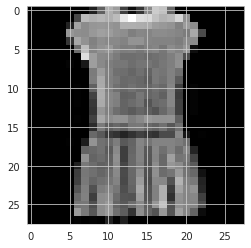

In [ ]:
plt.imshow(X_train[3], cmap='gray')

In [24]:
def plot_images(images, lbl_true=None, lbl_wrong=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    
    label_true_w = pd.Series(lbl_true).map(lambda x: classes[x])
    label_pred_w = pd.Series(lbl_wrong).map(lambda x: classes[x])
        
    if not lbl_true is None:
        try:
            ax.set_title(f"T: {label_true_w[i]}\n P: {label_pred_w[i]}", fontsize=16)
        except Exception:
            ax.set_title(f"T: {label_true_w[i]}", fontsize=16)
    
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [ ]:
def get_samples(n_samples, X, y=None):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(X)), n_samples, replace=False)
  if not y is None:
    return X[samples_index], y[samples_index]
  return X[samples_index]

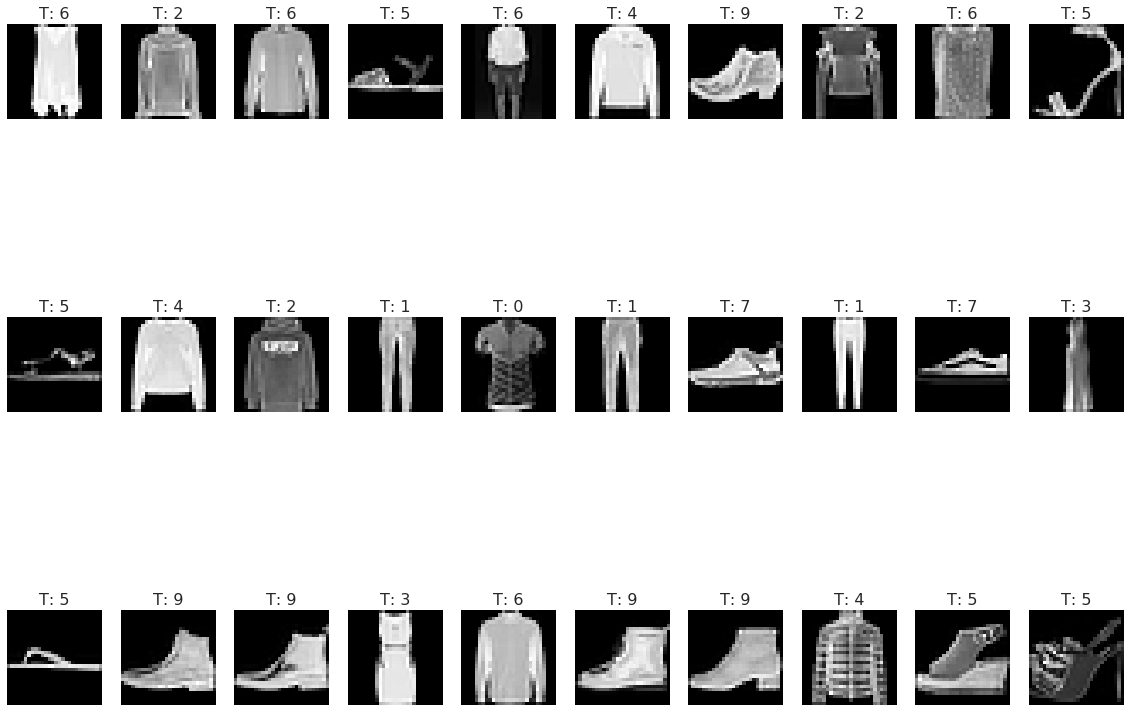

In [ ]:
images, labels = get_samples(30, X_train, y_train)
plot_images(images, labels)

# Your Code 

These are numpy arrays:
- X_train 
- y_train 
- X_test 
- y_test

In [ ]:
print('Trainingm data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Trainingm data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Test set

Here is the test set without label (FMNIST_augmented_test.npy). You will use your trained machine learning model to make predictions on this test set, and then submit a csv file containing the predictions 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
PATH = ''

In [ ]:
X_test_augmented = np.load(PATH + 'FMNIST_augmented_test.npy')

In [ ]:
X_test_augmented.shape

(40000, 28, 28)

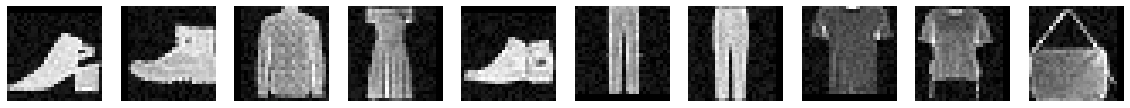

In [ ]:
images = get_samples(10, X_test_augmented)
plot_images(images)

Note: **pay a close attention to this test set**. 

This test set is slightly different from the train set. In order to improve your model, **make sure you know what the difference is so that you can perform appropriate processings**.

# Submit your predictions as csv file

In [ ]:
# let's make a silly prediction that every image is T-shirt, meaning every prediction is 0
# Here is how you can make such prediction
predictions = np.zeros(shape=[len(X_test_augmented),]).astype(int)

In [ ]:
predictions.shape # make sure that you have 40000 predictions, since the hidden test set has 40000 images

In [ ]:
pred_df = pd.DataFrame(predictions,columns=['pred'])
pred_df.head()

In [ ]:
MY_NAME=______  # please put your name here in this format: firstname_lastname, e.g. quan_tran
pred_df.to_csv(PATH + f"/submissions/{MY_NAME}_submission.csv", index=None)

By running the cell above, you actually submit your predictions directly to the submissions folder in Weekly_Project folder, as I have granted you permission to save files there. Let me know if you have any problem running the cell above.



Good luck!



---



# SOLUTION

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib 
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

classes = {0: 'T-shirt/top',
            1: 'Trouser',
            2: 'Pullover',
            3: 'Dress',
            4: 'Coat',
            5: 'Sandal',
            6: 'Shirt',
            7: 'Sneaker',
            8: 'Bag',
            9: 'Ankle boot'}



import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")


4431872/4422102 [==============================] - 0s 0us/step


In [16]:
# Evaluate function:
def evaluate(estimator, X, y,cross_val_score=None, on='train'):
    y_pred = estimator.predict(X)
    
    if not cross_val_score is None:
        print(f'mean accuracy on {on} set: ', cross_val_score.mean(), '\n')
    else:
        print(f'accuracy on {on} set: ', accuracy_score(y, y_pred), '\n')
    
    print(classification_report(y, y_pred))
    
    # Confusion_matrix:
    con_matrix = pd.crosstab(pd.Series(y, name='Actual' ),pd.Series(y_pred, name='Predicted'))
    plt.figure(figsize = (9,6))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix, cmap="Blues", annot=True, fmt='g')

    return y_pred

# Plot image:
def plot_images(images, lbl_true=None, lbl_wrong=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    
    label_true_w = pd.Series(lbl_true).map(lambda x: classes[x])
    label_pred_w = pd.Series(lbl_wrong).map(lambda x: classes[x])
        
    if not lbl_true is None:
        try:
            ax.set_title(f"T: {label_true_w[i]}\n P: {label_pred_w[i]}", fontsize=16)
        except Exception:
            ax.set_title(f"T: {label_true_w[i]}", fontsize=16)
    
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [ ]:
# load data:
# X_train_pca = joblib.load('X_train_pca_100')
# X_test_pca = joblib.load('X_test_pca_100')
# y_train = joblib.load('y_train')
# y_test = joblib.load('y_test')
# X_train_fl = joblib.load('X_train_fl')
# X_test_fl = joblib.load('X_test_fl')


In [ ]:
# # Get sample:
# pct_sample = 0.1

# X_train_pca_sp, X_not_used, y_train_sp, y_not_used = train_test_split(X_train_pca, y_train, 
#                                                                 test_size=(1-pct_sample), 
#                                                                 stratify=y_train,
#                                                                 )

# # Best Xgboost:
# xgfn = XGBClassifier(learning_rate =0.3,
#                      n_estimators=120,
#                      max_depth=7,
#                      min_child_weight=1,
#                      gamma=0,
#                      subsample=0.8,
#                     n_jobs= -1)


## Normalize and reshape data:

In [7]:
# Reshape data into 2D DataFrame 
X_train_rs = X_train.reshape((X_train.shape[0],-1))
X_test_rs = X_test.reshape((X_test.shape[0],-1))

X_train_rs.shape, X_test_rs.shape

((60000, 784), (10000, 784))

In [8]:
# check min max
(X_train_rs.min(), X_train_rs.max()),(X_test_rs.min(), X_test_rs.max())

((0, 255), (0, 255))

In [9]:
# Nomalize data by using MinmaxScaler
from sklearn.preprocessing import MinMaxScaler

X_train_fl = MinMaxScaler().fit_transform(X_train_rs)
X_test_fl = MinMaxScaler().fit_transform(X_test_rs)

# Check min_max after normalize:
(X_train_fl.min(), X_train_fl.max()),(X_test_fl.min(), X_test_fl.max())

((0.0, 1.0), (0.0, 1.0))

## PCA

In [10]:
from sklearn.decomposition import PCA

In [10]:
X_train_fl.shape, y_train.shape

((60000, 784), (60000,))

Text(0, 0.5, 'cumulative explained variance')

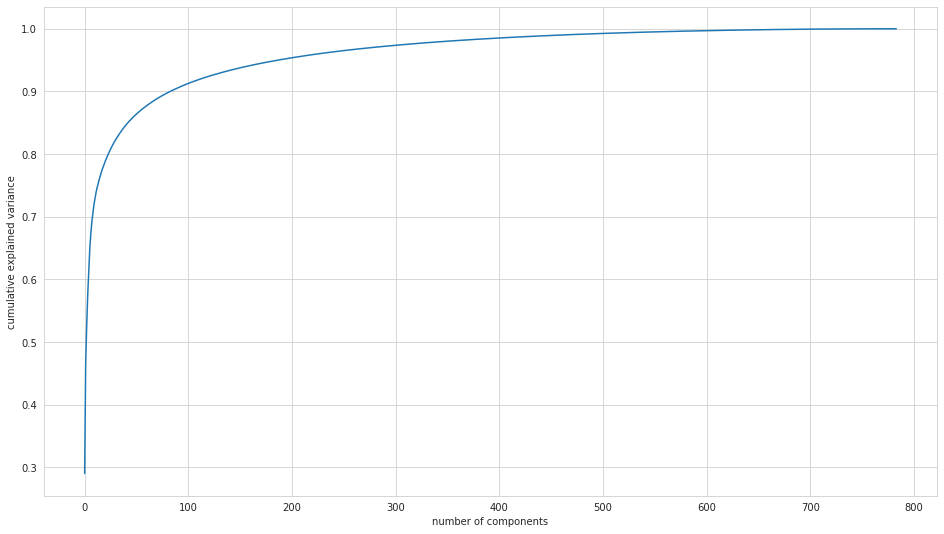

In [11]:
# Plot PCA
sns.set_style('whitegrid')

plt.figure(figsize=(16, 9))
pca = PCA().fit(X_train_fl)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')


In [12]:
# Variance ratio with 100 components:
pca.explained_variance_ratio_[:100].sum()

0.9122068819328322

To saving time when training and predicting, we can use data set after PCA with 100 components which have presented ~91.2% of the total variance, for training model.

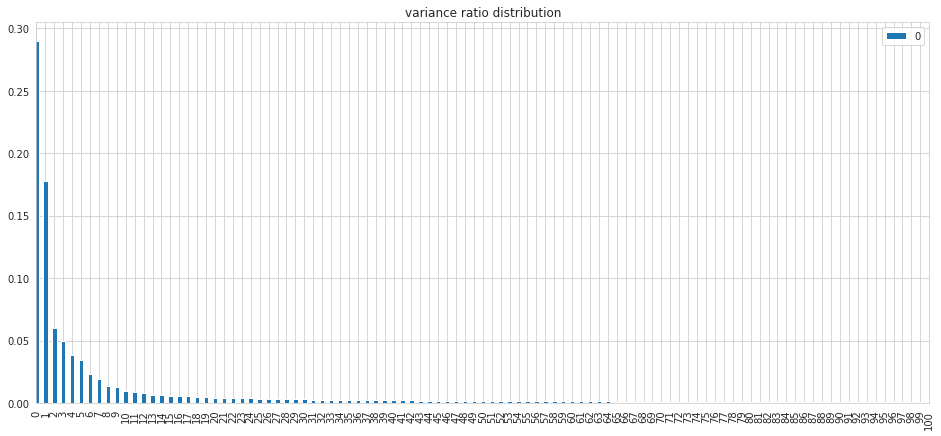

In [13]:
pd.DataFrame(pca.explained_variance_ratio_).plot(kind='bar', figsize=(16,7))
plt.title('variance ratio distribution')
plt.xlim(0,100)
plt.show()

In [11]:
# in put 
def pca_set(X_train_fl, X_test_fl, n_components):
    pca_used = PCA(n_components=n_components)

    # Trainsform data set:
    X_train_pca = pca_used.fit_transform(X_train_fl)
    X_test_pca = pca_used.transform(X_test_fl)
    
    # saving pca:
    joblib.dump(X_train_pca, f'X_train_pca_{pca_used.n_components_}')
    joblib.dump(X_test_pca, f'X_test_pca_{pca_used.n_components_}')    
    
    print(f'DONE === with n_components: {pca_used.n_components_}')
    
    return X_train_pca, X_test_pca

X_train_pca, X_test_pca = pca_set(X_train_fl, X_test_fl, 100)

DONE === with n_components: 100


In [15]:
import plotly.express as px

fig = px.scatter_3d(X_train_pca, x=X_train_pca[:,0], y=X_train_pca[:,1], z=X_train_pca[:,2],
                    color=y_train)

fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [16]:
X_train_pca.shape, X_test_pca.shape

((60000, 100), (10000, 100))

## Model evaluation:

In [21]:
model_results = {}
def save_results(model_name, train_set, test_set):
    model_results[model_name] = []
    model_results[model_name].append(train_set)
    model_results[model_name].append(test_set)
    return model_results

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
lr = LogisticRegression()

cvs = cross_val_score(lr, X_train_pca, y_train,
                      scoring='accuracy',
                      cv=KFold(5,True, 96),
                      n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   19.2s finished


In [ ]:
# Mean score of accuracy:
cvs.mean()

0.8508000000000001

In [ ]:
lr.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

mean accuracy on train set:  0.8508000000000001 

              precision    recall  f1-score   support

           0       0.80      0.83      0.82      6000
           1       0.98      0.97      0.97      6000
           2       0.76      0.75      0.75      6000
           3       0.85      0.88      0.87      6000
           4       0.75      0.78      0.76      6000
           5       0.94      0.94      0.94      6000
           6       0.65      0.59      0.62      6000
           7       0.91      0.93      0.92      6000
           8       0.95      0.95      0.95      6000
           9       0.95      0.95      0.95      6000

    accuracy                           0.86     60000
   macro avg       0.85      0.86      0.85     60000
weighted avg       0.85      0.86      0.85     60000



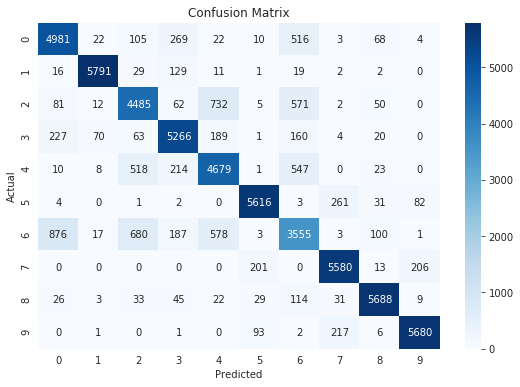

In [ ]:
evaluate(lr, X_train_pca, y_train, cvs, on='train')

accuracy on test set:  0.8407 

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.72      0.73      1000
           3       0.83      0.86      0.84      1000
           4       0.72      0.75      0.74      1000
           5       0.94      0.93      0.93      1000
           6       0.62      0.56      0.58      1000
           7       0.91      0.93      0.92      1000
           8       0.93      0.94      0.94      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



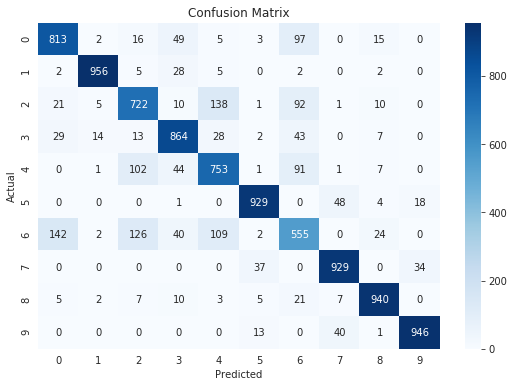

In [ ]:
evaluate(lr, X_test_pca, y_test,on='test')

In [22]:
save_results('LogisticRegression', 0.8508, 0.8407)


{'LogisticRegression': [0.8508, 0.8407]}

### XGboost:

In [ ]:
from xgboost import XGBClassifier


#### Find the best learning rate:

Learning rate can makes the model more robust by shrinking the weights on each step
Typical final values to be used: 0.01-0.2

In this case i will use learning_rate = [0.001, 0.01, 0.1, 0.5, 1] to train data

In [ ]:
xgb1 = XGBClassifier(learning_rate =0.1,
                     n_estimators=100,
                     max_depth=5,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8)

In [ ]:
params = {'learning_rate': [0.01,0.1,0.3,0.5,1]}

gs1 = GridSearchCV(xgb1, params,
                   scoring = 'accuracy', cv=5, n_jobs=-1,
                   verbose=1)

In [ ]:
gs1.fit(X_train_pca_sp, y_train_sp)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 16.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3, 0.5, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy',

In [ ]:
gs1.best_score_

0.86025

In [ ]:
pd.DataFrame(gs1.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,184.434006,4.583613,0.313199,0.022503,0.01,{'learning_rate': 0.01},0.813333,0.817917,0.800417,0.813750,0.800417,0.809167,0.007322,5
1,169.576617,0.635634,0.403928,0.164327,0.1,{'learning_rate': 0.1},0.856667,0.862500,0.841250,0.855833,0.849167,0.853083,0.007272,3
2,156.409954,1.134582,0.326404,0.043045,0.3,{'learning_rate': 0.3},0.859583,0.868750,0.856667,0.857917,0.858333,0.860250,0.004351,1
3,137.096395,0.832462,0.288146,0.001634,0.5,{'learning_rate': 0.5},0.857917,0.862500,0.863333,0.853333,0.854583,0.858333,0.004040,2
4,94.534985,14.655797,0.212214,0.034861,1,{'learning_rate': 1},0.839583,0.846667,0.847083,0.841667,0.841250,0.843250,0.003044,4


We can see that the difference in accuracy between the learning rates is not much. So we can choose learning rate = 0.3    

In [ ]:
best_model = gs1.best_estimator_

In [ ]:
# train model with full data:
best_model.fit(X_train_pca, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
evaluate(best_model, X_test_pca, y_test, on='test')

accuracy on test set:  0.8698 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.78      0.78      1000
           3       0.88      0.89      0.88      1000
           4       0.78      0.80      0.79      1000
           5       0.95      0.94      0.95      1000
           6       0.67      0.61      0.64      1000
           7       0.93      0.94      0.93      1000
           8       0.96      0.96      0.96      1000
           9       0.95      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### Using learing_rate = 0.3, tune n_estimators, max_depth, min_child_weight:

In [ ]:

params = {'learning_rate': [0.3],
         'n_estimators': range(50,170,20),
         'max_depth': range(3, 10, 2),
         'min_child_weight':range(1,6,2)}

rd_search = RandomizedSearchCV(xgb1, params,n_iter=10,
                           scoring = 'accuracy', cv=5, n_jobs=-1,
                           verbose=1)

In [ ]:
rd_search.fit(X_train_pca_sp, y_train_sp)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 12.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=5, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.8, verbosity=1),
                   iid='

In [ ]:
rd_search.best_score_

0.8454166666666667

In [ ]:
pd.DataFrame(rd_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_child_weight,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,74.245450,4.261897,0.605811,0.155979,110,1,9,0.3,"{'n_estimators': 110, 'min_child_weight': 1, '...",0.844167,0.842083,0.850000,0.849167,0.841250,0.845333,0.003607,2
1,34.930726,2.494691,0.230222,0.036463,90,3,3,0.3,"{'n_estimators': 90, 'min_child_weight': 3, 'm...",0.825417,0.822500,0.844167,0.837500,0.831250,0.832167,0.007903,10
2,37.895205,0.972184,0.194525,0.008159,50,3,9,0.3,"{'n_estimators': 50, 'min_child_weight': 3, 'm...",0.834167,0.835000,0.844583,0.840833,0.845417,0.840000,0.004692,8
3,85.834840,1.199990,0.547118,0.011451,150,1,7,0.3,"{'n_estimators': 150, 'min_child_weight': 1, '...",0.844583,0.836250,0.851667,0.844583,0.850000,0.845417,0.005394,1
4,36.808234,1.149417,0.206420,0.003941,70,3,5,0.3,"{'n_estimators': 70, 'min_child_weight': 3, 'm...",0.836250,0.828750,0.853750,0.835833,0.852500,0.841417,0.009932,7
5,63.055485,0.935288,0.456062,0.084035,130,5,7,0.3,"{'n_estimators': 130, 'min_child_weight': 5, '...",0.837500,0.835417,0.851250,0.838333,0.846250,0.841750,0.006006,6
6,69.515899,2.943885,0.469013,0.022495,130,3,7,0.3,"{'n_estimators': 130, 'min_child_weight': 3, '...",0.837083,0.835833,0.855417,0.842917,0.850000,0.844250,0.007506,3
7,68.487748,2.881610,0.489447,0.078829,150,5,5,0.3,"{'n_estimators': 150, 'min_child_weight': 5, '...",0.842083,0.830417,0.857083,0.840417,0.841667,0.842333,0.008529,4
8,53.078277,3.791822,0.368418,0.061311,150,5,3,0.3,"{'n_estimators': 150, 'min_child_weight': 5, '...",0.838333,0.828333,0.854167,0.837917,0.839167,0.839583,0.008292,9
9,57.980920,7.806861,0.336933,0.039922,130,5,5,0.3,"{'n_estimators': 130, 'min_child_weight': 5, '...",0.842917,0.830000,0.855000,0.838750,0.842500,0.841833,0.008056,5


In [ ]:
rd_search.best_params_

{'n_estimators': 150,
 'min_child_weight': 1,
 'max_depth': 7,
 'learning_rate': 0.3}

sau khi khảo sát, ta có thể tunning các hyper params cho bước tiếp theo như sau:

    n_estimators: 110,120,130
    min_child_weight : 1,2
    max_depth: 6,7,8,9

#### Using learing_rate = 0.3, tune n_estimators, max_depth, min_child_weight 2

In [ ]:

params = {'learning_rate': [0.3],
         'n_estimators': [110,120,130],
         'max_depth': [6,7,8,9],
         'min_child_weight':[1,2]}

gr_search = GridSearchCV(xgb1, params,
                           scoring = 'accuracy', cv=5, n_jobs=-1,
                           verbose=1)

In [ ]:
gr_search.fit(X_train_pca_sp, y_train_sp)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed: 40.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=0.8, verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'learning_rate': [0.3], 'max_depth': [6, 7, 8, 9],
                         'min_child_weight': [1, 2],
                         'n_estimators': [110, 1

In [ ]:
gr_search.best_score_


0.8459166666666667

In [ ]:
pd.DataFrame(gr_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,78.259224,2.634727,0.451750,0.115155,0.3,6,1,110,"{'learning_rate': 0.3, 'max_depth': 6, 'min_ch...",0.841667,0.848333,0.851250,0.833750,0.839167,0.842833,0.006299,20
1,78.652342,2.127376,0.578291,0.147180,0.3,6,1,120,"{'learning_rate': 0.3, 'max_depth': 6, 'min_ch...",0.842083,0.848333,0.852083,0.833333,0.840417,0.843250,0.006505,17
2,82.816170,4.429318,0.651792,0.164378,0.3,6,1,130,"{'learning_rate': 0.3, 'max_depth': 6, 'min_ch...",0.843750,0.846250,0.851250,0.832917,0.841667,0.843167,0.006042,18
3,70.487327,4.576762,0.414861,0.061026,0.3,6,2,110,"{'learning_rate': 0.3, 'max_depth': 6, 'min_ch...",0.847917,0.841250,0.855417,0.838333,0.838333,0.844250,0.006590,12
4,76.816761,2.175841,0.550503,0.129733,0.3,6,2,120,"{'learning_rate': 0.3, 'max_depth': 6, 'min_ch...",0.845833,0.842500,0.856250,0.840000,0.840833,0.845083,0.005930,4
5,79.240914,3.621908,0.754402,0.315543,0.3,6,2,130,"{'learning_rate': 0.3, 'max_depth': 6, 'min_ch...",0.848333,0.842083,0.856667,0.839167,0.839583,0.845167,0.006618,3
6,75.734352,5.169270,0.551635,0.150787,0.3,7,1,110,"{'learning_rate': 0.3, 'max_depth': 7, 'min_ch...",0.847500,0.842500,0.855000,0.839167,0.841250,0.845083,0.005667,6
7,76.566328,2.917920,0.448629,0.021679,0.3,7,1,120,"{'learning_rate': 0.3, 'max_depth': 7, 'min_ch...",0.847083,0.845833,0.854583,0.840417,0.841667,0.845917,0.004996,1
8,80.620311,0.511997,0.546516,0.135171,0.3,7,1,130,"{'learning_rate': 0.3, 'max_depth': 7, 'min_ch...",0.847917,0.844583,0.854583,0.840833,0.840833,0.845750,0.005146,2
9,68.638046,2.948792,0.476586,0.087414,0.3,7,2,110,"{'learning_rate': 0.3, 'max_depth': 7, 'min_ch...",0.845833,0.849583,0.850417,0.839167,0.839167,0.844833,0.004878,7


In [ ]:
gr_search.best_params_

{'learning_rate': 0.3,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 120}

#### Run again with best params in all data set without pca

In [ ]:
xgfn = XGBClassifier(learning_rate =0.3,
                     n_estimators=120,
                     max_depth=7,
                     min_child_weight=1,
                     gamma=0,
                     subsample=0.8,
                    n_jobs= -1)

In [ ]:
xgfn.fit(X_train_fl, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# joblib.dump(xgfn, 'Xgboost_final')

['Xgboost_final']

In [ ]:
xgfn = joblib.load('Xgboost_final')

In [ ]:
xgfn.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=120, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)>

accuracy on train set:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



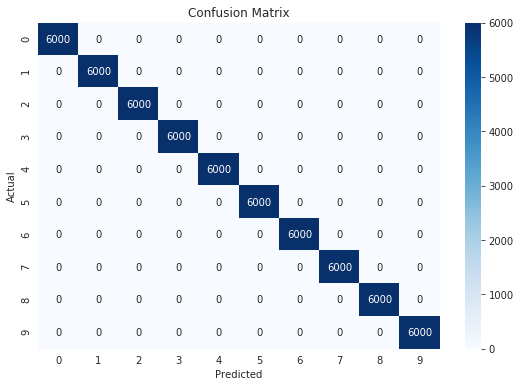

In [ ]:
evaluate(xgfn, X_train_fl, y_train, on='train')

accuracy on test set:  0.8979 

              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.84      0.82      1000
           3       0.90      0.91      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.68      0.71      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



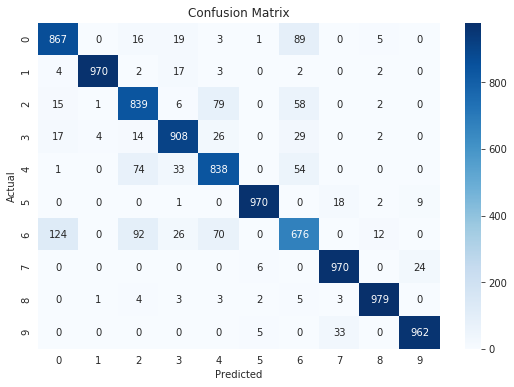

In [ ]:
evaluate(xgfn, X_test_fl, y_test, on='test')

In [23]:
save_results('XGBoost without PCA', 1, 0.8979)

{'LogisticRegression': [0.8508, 0.8407], 'XGBoost without PCA': [1, 0.8979]}

#### Xgboost with best paras with dataset pca = 100

In [ ]:
X_train_pca.shape, X_test_pca.shape

((60000, 100), (10000, 100))

In [ ]:
xgfn.fit(X_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# joblib.dump(xgfn, 'Xgboost_final_trained_pca_100')

['Xgboost_final_trained_pca_100']

In [ ]:
# xgfn = joblib.load('Xgboost_final_trained_pca_113')

accuracy on train set:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



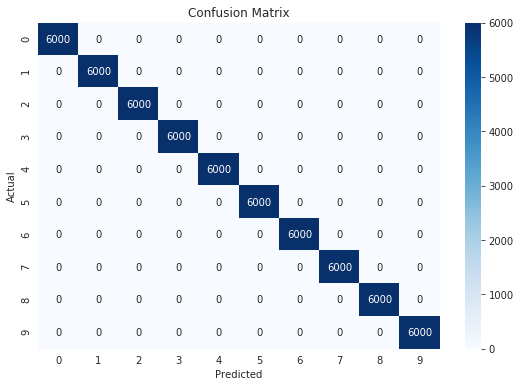

In [ ]:
evaluate(xgfn, X_train_pca, y_train, on='train')

accuracy on test set:  0.8825 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.80      0.81      0.80      1000
           5       0.96      0.95      0.96      1000
           6       0.71      0.68      0.69      1000
           7       0.93      0.96      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.96      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



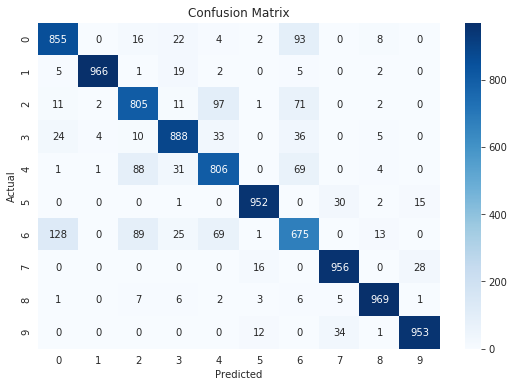

In [ ]:
evaluate(xgfn, X_test_pca, y_test, on='test')

In [24]:
save_results('XGBoost PCA 100', 1, 0.8825)

{'LogisticRegression': [0.8508, 0.8407],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost without PCA': [1, 0.8979]}

#### Xgboost with best paras and pca = 350

In [ ]:
X_train_pca_350 = joblib.load('X_train_pca_350')
X_test_pca_350 = joblib.load('X_test_pca_350')

X_train_pca_350.shape, X_test_pca_350.shape

((60000, 350), (10000, 350))

In [ ]:
xgfn.fit(X_train_pca_350, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=120, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# joblib.dump(xgfn, 'Xgboost_final_trained_pca_350')

['Xgboost_final_trained_pca_350']

accuracy on train set:  1.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



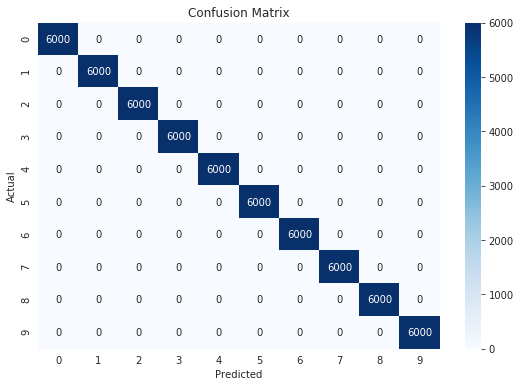

In [ ]:
evaluate(xgfn, X_train_pca_350, y_train)

accuracy on train set:  0.5513 

              precision    recall  f1-score   support

           0       0.67      0.79      0.73      1000
           1       0.98      0.89      0.93      1000
           2       0.17      0.15      0.16      1000
           3       0.72      0.78      0.75      1000
           4       0.44      0.40      0.42      1000
           5       0.74      0.59      0.66      1000
           6       0.27      0.18      0.22      1000
           7       0.70      0.82      0.75      1000
           8       0.91      0.92      0.91      1000
           9       0.00      0.00      0.00      1000

    accuracy                           0.55     10000
   macro avg       0.56      0.55      0.55     10000
weighted avg       0.56      0.55      0.55     10000



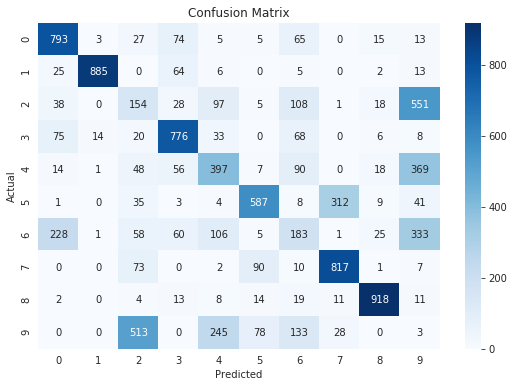

In [ ]:
evaluate(xgfn, X_test_pca_350, y_test)

In [ ]:
xgfn.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, n_estimators=120, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)>

In [25]:
save_results('XGBoost PCA 350', 1, 0.5513)

{'LogisticRegression': [0.8508, 0.8407],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost without PCA': [1, 0.8979]}

#### Xgboost with best paras and pca = 40

In [ ]:
X_train_pca_40, X_test_pca_40 = pca_set(X_train_fl, X_test_fl, 40)
X_train_pca_40.shape, X_test_pca_40.shape

DONE === with n_components: 40


((60000, 40), (10000, 40))

In [ ]:
xgfn.fit(X_train_pca_40, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=120, n_jobs=-1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
# joblib.dump(xgfn, 'Xgboost_final_trained_pca_40')

['Xgboost_final_trained_pca_40']

accuracy on train set:  0.9999666666666667 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6000
           1       1.00      1.00      1.00      6000
           2       1.00      1.00      1.00      6000
           3       1.00      1.00      1.00      6000
           4       1.00      1.00      1.00      6000
           5       1.00      1.00      1.00      6000
           6       1.00      1.00      1.00      6000
           7       1.00      1.00      1.00      6000
           8       1.00      1.00      1.00      6000
           9       1.00      1.00      1.00      6000

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000



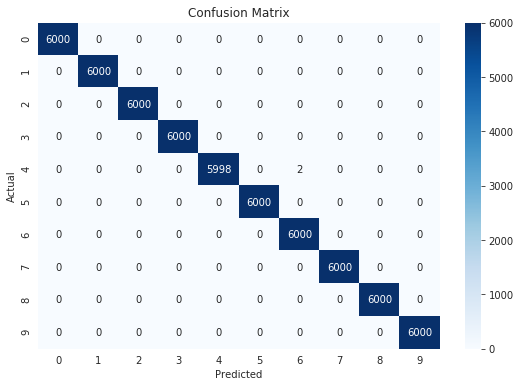

In [ ]:
evaluate(xgfn, X_train_pca_40, y_train)

accuracy on test set:  0.8726 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.99      0.96      0.98      1000
           2       0.76      0.78      0.77      1000
           3       0.89      0.89      0.89      1000
           4       0.78      0.79      0.79      1000
           5       0.96      0.94      0.95      1000
           6       0.68      0.65      0.67      1000
           7       0.93      0.95      0.94      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



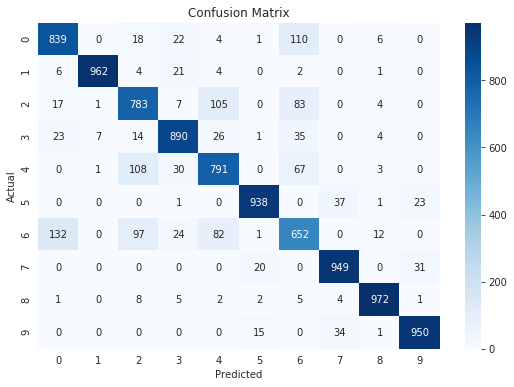

In [ ]:
evaluate(xgfn, X_test_pca_40, y_test, on='test')

In [26]:
save_results('XGBoost PCA 40', 0.999, 0.8726)

{'LogisticRegression': [0.8508, 0.8407],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost PCA 40': [0.999, 0.8726],
 'XGBoost without PCA': [1, 0.8979]}

### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k = KNeighborsClassifier()

In [ ]:
param_grid = {'n_neighbors': np.arange(1,10), 
              'weights': ['uniform', 'distance'],
              'leaf_size': [30,40,50]}

knn_model = RandomizedSearchCV(k, param_grid, n_iter=30,
                                scoring='accuracy',
                                n_jobs= -1,
                                cv=5,
                                verbose=1)


In [ ]:
knn_model.fit(X_train_sp, y_train_sp)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'leaf_size': [30, 40, 50],
                                        'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'weights': ['uniform', 'distance']},
                   scoring='accuracy', verbose=1)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_model.best_params_)


tuned hpyerparameters :(best parameters)  {'weights': 'distance', 'n_neighbors': 4, 'leaf_size': 30}


In [ ]:
# caculate the predictions
train_predictions_label = knn_model.predict(X_train_sp)

test_predictions_label = knn_model.predict(X_test_fl)

In [ ]:
#get the score of train set 
accuracy_score(y_train_sp, train_predictions_label)


1.0

In [ ]:
# and test set 
accuracy_score(y_test, test_predictions_label)


0.832

In [27]:
save_results('KNN', 1, 0.832)

{'KNN': [1, 0.832],
 'LogisticRegression': [0.8508, 0.8407],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost PCA 40': [0.999, 0.8726],
 'XGBoost without PCA': [1, 0.8979]}

### Decision tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
trees = DecisionTreeClassifier()
param_grid1 = {'max_depth': np.arange(5,30), 
              'min_samples_leaf': np.arange(1,300)
             }
tree_model =  RandomizedSearchCV(trees, param_grid1, n_iter=30,
                                scoring='accuracy',
                                n_jobs= -1,
                                cv=5,
                                verbose=1)

In [ ]:
tree_model.fit(X_train_sp,y_train_sp)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=30,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29]),
                                        'min_samples_leaf': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  4...
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273,
       274, 275, 276, 277, 278, 279, 280

In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_model.best_params_)


tuned hpyerparameters :(best parameters)  {'min_samples_leaf': 19, 'max_depth': 19}


In [ ]:
# caculate the predictions
train_predictions_label = tree_model.predict(X_train_sp)

test_predictions_label = tree_model.predict(X_test_fl)

In [ ]:
#get the score of train set 
from sklearn.metrics import accuracy_score
accuracy_score(y_train_sp, train_predictions_label)


0.8567222222222223

In [ ]:
# and test set 
accuracy_score(y_test, test_predictions_label)


0.785

In [28]:
save_results('Decision Tree', 0.8567, 0.785)

{'Decision Tree': [0.8567, 0.785],
 'KNN': [1, 0.832],
 'LogisticRegression': [0.8508, 0.8407],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost PCA 40': [0.999, 0.8726],
 'XGBoost without PCA': [1, 0.8979]}

### AdaBoost

In [ ]:
import numpy as np

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
param_grid2 = {'n_estimators':[50,60,70,80], 
              'learning_rate': np.arange(1,10)
             }
ada_model =  RandomizedSearchCV(ada, param_grid2, n_iter=30,
                                scoring='accuracy',
                                n_jobs= -1,
                                cv=5,
                                verbose=1)

In [ ]:
ada_model.fit(X_train_sp,y_train_sp)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(), n_iter=30, n_jobs=-1,
                   param_distributions={'learning_rate': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': [50, 60, 70, 80]},
                   scoring='accuracy', verbose=1)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",ada_model.best_params_)


tuned hpyerparameters :(best parameters)  {'n_estimators': 80, 'learning_rate': 3}


In [ ]:
# caculate the predictions
train_predictions_label = ada_model.predict(X_train_sp)

test_predictions_label = ada_model.predict(X_test_fl)

In [ ]:
#get the score of train set
>>> from sklearn.metrics import accuracy_score
accuracy_score(y_train_sp, train_predictions_label)

0.4106111111111111

In [ ]:
#  and test set
accuracy_score(y_test, test_predictions_label)


0.404

In [29]:
save_results('AdaBoost', 0.410, 0.404)


{'AdaBoost': [0.41, 0.404],
 'Decision Tree': [0.8567, 0.785],
 'KNN': [1, 0.832],
 'LogisticRegression': [0.8508, 0.8407],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost PCA 40': [0.999, 0.8726],
 'XGBoost without PCA': [1, 0.8979]}

### RandomForest

In [ ]:
rf = RandomForestClassifier(n_estimators=100, max_depth=50, random_state=42)
rf.fit(X_pca, y_train)

RandomForestClassifier(max_depth=50, random_state=42)

In [ ]:
eval(rf, X_test_pca, y_test,on='test')

accuracy on test set:  0.8614 

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1000
           1       1.00      0.95      0.97      1000
           2       0.76      0.80      0.78      1000
           3       0.87      0.89      0.88      1000
           4       0.77      0.80      0.78      1000
           5       0.93      0.92      0.93      1000
           6       0.70      0.57      0.63      1000
           7       0.92      0.93      0.92      1000
           8       0.93      0.96      0.94      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [32]:
save_results('RandomForest', 1, 0.8614)

{'AdaBoost': [0.41, 0.404],
 'Decision Tree': [0.8567, 0.785],
 'KNN': [1, 0.832],
 'LogisticRegression': [0.8508, 0.8407],
 'RandomForest': [1, 0.8614],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost PCA 40': [0.999, 0.8726],
 'XGBoost without PCA': [1, 0.8979]}

In [31]:
c_range = np.logspace(-4,1.2, 30, endpoint=True)
c_range

array([1.00000000e-04, 1.51115964e-04, 2.28360345e-04, 3.45088935e-04,
       5.21484470e-04, 7.88046282e-04, 1.19086373e-03, 1.79958520e-03,
       2.71946052e-03, 4.10953897e-03, 6.21016942e-03, 9.38455736e-03,
       1.41815643e-02, 2.14306075e-02, 3.23850691e-02, 4.89390092e-02,
       7.39546553e-02, 1.11757290e-01, 1.68883106e-01, 2.55209333e-01,
       3.85662042e-01, 5.82796911e-01, 8.80699168e-01, 1.33087703e+00,
       2.01116766e+00, 3.03919538e+00, 4.59270939e+00, 6.94031705e+00,
       1.04879270e+01, 1.58489319e+01])

### SVC

In [ ]:
svc = SVC(C=13,kernel='rbf',gamma="auto",probability = True)
svc.fit(X_train_pca,y_train)

accuracy on train set:  0.9432666666666667 

              precision    recall  f1-score   support

           0       0.90      0.93      0.91      6000
           1       1.00      0.99      0.99      6000
           2       0.90      0.90      0.90      6000
           3       0.93      0.96      0.94      6000
           4       0.89      0.91      0.90      6000
           5       0.99      0.98      0.99      6000
           6       0.87      0.82      0.84      6000
           7       0.96      0.98      0.97      6000
           8       1.00      0.99      1.00      6000
           9       0.99      0.97      0.98      6000

    accuracy                           0.94     60000
   macro avg       0.94      0.94      0.94     60000
weighted avg       0.94      0.94      0.94     60000



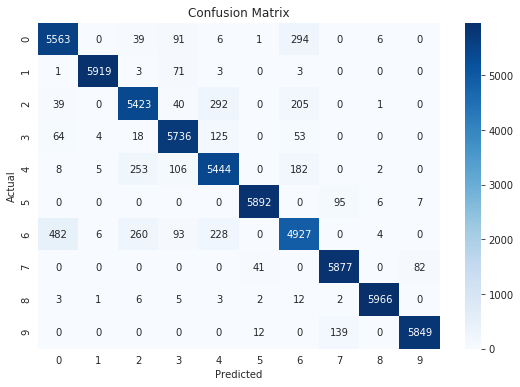

In [ ]:
# Evaluate in train set:
evaluate(svc, X_train_pca, y_train)

accuracy on train set:  0.8955 

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.81      0.82      0.82      1000
           3       0.89      0.91      0.90      1000
           4       0.82      0.84      0.83      1000
           5       0.98      0.96      0.97      1000
           6       0.74      0.70      0.72      1000
           7       0.93      0.97      0.95      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



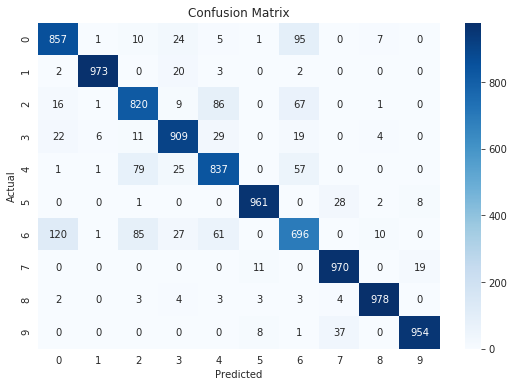

In [ ]:
# Evaluate in test set:
evaluate(svc, X_test_pca, y_test)

In [33]:
save_results('SVC', 0.94326, 0.8955)

{'AdaBoost': [0.41, 0.404],
 'Decision Tree': [0.8567, 0.785],
 'KNN': [1, 0.832],
 'LogisticRegression': [0.8508, 0.8407],
 'RandomForest': [1, 0.8614],
 'SVC': [0.94326, 0.8955],
 'XGBoost PCA 100': [1, 0.8825],
 'XGBoost PCA 350': [1, 0.5513],
 'XGBoost PCA 40': [0.999, 0.8726],
 'XGBoost without PCA': [1, 0.8979]}

## Models comparition

In [45]:
models = pd.DataFrame(model_results).T.reset_index()
models.columns = ['Model','Train set', 'Test set']

models

,Model,Train set,Test set
0,LogisticRegression,0.85080,0.8407
1,XGBoost without PCA,1.00000,0.8979
2,XGBoost PCA 100,1.00000,0.8825
3,XGBoost PCA 350,1.00000,0.5513
4,XGBoost PCA 40,0.99900,0.8726
5,KNN,1.00000,0.8320
6,Decision Tree,0.85670,0.7850
7,AdaBoost,0.41000,0.4040
8,RandomForest,1.00000,0.8614
9,SVC,0.94326,0.8955


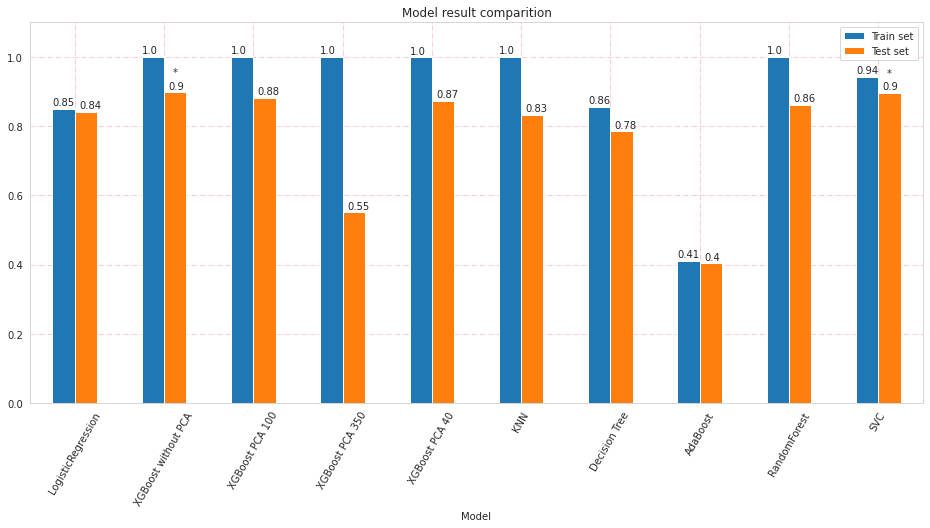

In [83]:
models.plot(kind='bar', x = 'Model', figsize=(16,7))

for i in range(len(models)):
    # train label:
    plt.text(i-0.25,models['Train set'][i]+0.01 , round(models['Train set'][i],2))

    # test label:
    plt.text(i+0.05,models['Test set'][i]+0.01 , round(models['Test set'][i],2))

plt.ylim(0,1.1)
plt.title('Model result comparition')
plt.grid(ls='-.', c='pink')
plt.xticks(rotation=60)

i=1
plt.text(i+0.1,models['Test set'][i]+0.05 , '️*')
i=9
plt.text(i+0.1,models['Test set'][i]+0.05 , '️*')

plt.show()

- XGBoost(without be treated by PCA) and SVC(be treated by PCA with n_components=100) give the highest results in accuracy on test set.

- To save training time as well as make better predictions for noisy data, we decided to use SVC




## Pipeline

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

class preprocessing(BaseEstimator, TransformerMixin):
    def __init__(self, input_c):
        self.components = input_c
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # reshape
        X = X.reshape((X.shape[0],-1))

        # Nomalize
        X = MinMaxScaler().fit_transform(X)
        
        #pca
        pca = PCA(n_components=self.components)
        pca.fit(X)
        X = pca.transform(X)

        return X


final_pipe = Pipeline([ ('transform',preprocessing(100)),
                        ('model', SVC(C=13,kernel='rbf',gamma="auto",probability = True))])  


In [14]:
X_train_pca.shape, X_test_pca.shape

((60000, 100), (10000, 100))

In [15]:
final_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('transform', preprocessing(input_c=None)),
                ('model',
                 SVC(C=13, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='auto', kernel='rbf', max_iter=-1, probability=True,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

## Analysis result - using result of SVC

accuracy on train set:  0.9236666666666666 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6000
           1       0.99      0.98      0.99      6000
           2       0.87      0.88      0.88      6000
           3       0.92      0.94      0.93      6000
           4       0.86      0.88      0.87      6000
           5       0.97      0.97      0.97      6000
           6       0.84      0.76      0.79      6000
           7       0.94      0.95      0.95      6000
           8       0.99      0.99      0.99      6000
           9       0.96      0.97      0.97      6000

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



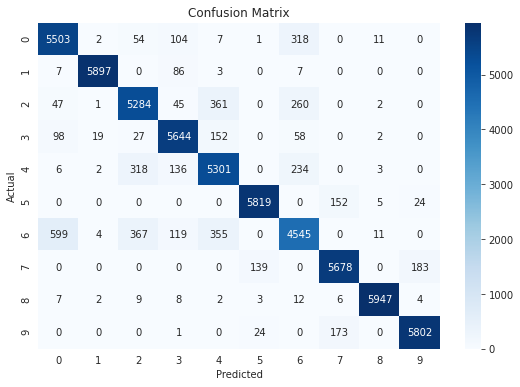

In [17]:
y_train_pred = evaluate(final_pipe, X_train, y_train)

accuracy on test set:  0.4881 

              precision    recall  f1-score   support

           0       0.55      0.70      0.62      1000
           1       0.89      0.88      0.89      1000
           2       0.36      0.24      0.29      1000
           3       0.62      0.60      0.61      1000
           4       0.40      0.30      0.34      1000
           5       0.41      0.33      0.37      1000
           6       0.17      0.20      0.19      1000
           7       0.60      0.74      0.66      1000
           8       0.65      0.88      0.75      1000
           9       0.01      0.00      0.00      1000

    accuracy                           0.49     10000
   macro avg       0.47      0.49      0.47     10000
weighted avg       0.47      0.49      0.47     10000



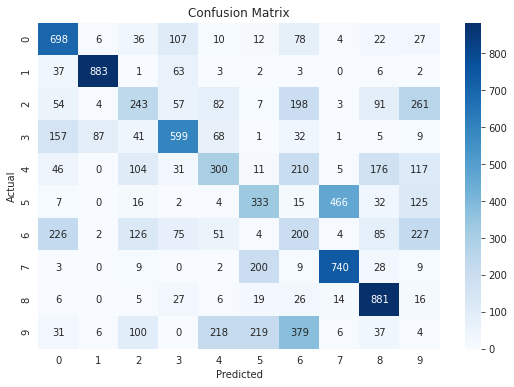

In [18]:
# Evaluate in test set:
y_test_pred = evaluate(final_pipe, X_test, y_test, on='test')

- Class 6 (Shirt) makes the model the most difficult to predict
- Model is most confused between class 6 (shirt) vs class 0 (T-shirt/top)
- In addition, the model also confused quite a lot between class pairs such as: 2 (Pullover) - 4 (Coat) - 6 (Shirt)


In [25]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

classes_name = [f'{i}: {classes[i]}'for i in classes.keys()]
print(classes_name)

def plot_images_2( class_code=0):
    no_img = 50
    condition = (y_train!=y_train_pred) & (y_train==class_code)

    wrong_pred_imgs = X_train[condition]
    label_true = y_train[condition]
    label_pred = y_train_pred[condition]

    plot_images(wrong_pred_imgs[:no_img], label_true[:no_img], label_pred[:no_img])

    
classes_name = [f'{i}: {classes[i]}'for i in classes.keys()]
drop_down = widgets.Dropdown(options = classes.keys(),  description = 'select class:')


widgets.interact(plot_images_2, class_code=drop_down)

['0: T-shirt/top', '1: Trouser', '2: Pullover', '3: Dress', '4: Coat', '5: Sandal', '6: Shirt', '7: Sneaker', '8: Bag', '9: Ankle boot']


interactive(children=(Dropdown(description='select class:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9), value=0), …

<function __main__.plot_images_2>